In [1]:
import os, sys
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)

In [2]:
# importing scripts in scripts folder
from scripts import config as srp
# importing default libraries
import numpy as np
import pandas as pd
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# TINY_SIZE=8
# SMALL_SIZE = 12
# MEDIUM_SIZE = 16
# BIGGER_SIZE = 20

import random
import pyreadr
from sklearn.preprocessing import StandardScaler

**** scripts/config.py IMPORTED!!!
**** PROJECT FOLDER ,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [3]:
loc_output = './reports/figures/dataset_analysis'
srp.define_folder(os.path.join(loc_output))

FOLDER information,  ./reports/figures/dataset_analysis/


'./reports/figures/dataset_analysis/'

In [4]:
## Visualization purpose, normally needed to use hsa_mm for mouse experiment
df_bio = pd.read_csv('./data/processed/pbk_layer_hsa.txt')
print(df_bio.shape)
df_bio.head()

(2987, 94)


,symbol,hsa03320,hsa04010,hsa04012,hsa04014,hsa04015,hsa04020,hsa04022,hsa04024,hsa04062,...,hsa04925,hsa04960,hsa04961,hsa04962,hsa04970,hsa04971,hsa04972,hsa04973,hsa04976,hsa05100
0,akt3,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,tank,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,foxo6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,kir2ds2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,cldn24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
## MELANOMA EXPERIMENT
df_melanoma_reference = pyreadr.read_r('./data/external/exper_melanoma/reference.rds')[None]
df_melanoma_query = pyreadr.read_r('./data/external/exper_melanoma/query.rds')[None]
df_melanoma_reference.columns = df_melanoma_reference.columns.str.lower()
df_melanoma_query.columns = df_melanoma_query.columns.str.lower()

## MOUSE EXPERIMENT 
df_mouse_training = pd.read_pickle('./data/external/exper_mouse/mouse_learning.pck')
df_mouse_retrieval = pd.read_pickle('./data/external/exper_mouse/mouse_retrieval.pck')
df_mouse_training.columns = df_mouse_training.columns.str.lower()
df_mouse_retrieval.columns = df_mouse_retrieval.columns.str.lower()

## PBMC EXPERIMENT
df_pbmc = pd.read_pickle('./data/external/exper_pbmc/Immune.pck')
df_pbmc.columns = df_pbmc.columns.str.lower()

## IMMUNE EXPERIMENT
df_immune = pd.read_pickle('./data/external/exper_immune/Fig3g.pck')
#pyreadr.read_r('./data/external/exper_immune/Fig3g.data.rds.gz')[None]
# df_immune = df_immune.iloc[: , :-2]
df_immune.columns = df_immune.columns.str.lower()


In [6]:
gene_melanoma = set(df_melanoma_reference.columns).intersection(set(df_melanoma_query.columns))
gene_mouse = set(df_mouse_retrieval.columns).intersection(set(df_mouse_training.columns))
gene_immune_pbmc = set(df_immune.columns).intersection(set(df_pbmc.columns))
k_ =50
common_genes = set(df_bio['symbol']).intersection(gene_immune_pbmc.intersection(gene_melanoma.intersection(gene_mouse)))
random.seed(91)
random_genes = list(random.sample(list(common_genes), k=k_))
print(len(set(random_genes)))

50


## MELANOMA EXPERIMENT

### Reference Dataset

In [9]:
exper = 'Melanoma'
exper_dataset = 'reference'
exper_no = '1'

EXPORTED!!,  ./reports/figures/dataset_analysis/1.1_exper_Melanoma_reference_TPM.png
EXPORTED!!,  ./reports/figures/dataset_analysis/1.2_exper_Melanoma_reference_TPM_sw.png
EXPORTED!!,  ./reports/figures/dataset_analysis/1.3_exper_Melanoma_reference_TPM_log1p.png
EXPORTED!!,  ./reports/figures/dataset_analysis/1.4_exper_Melanoma_reference_TPM_sw_log1p.png


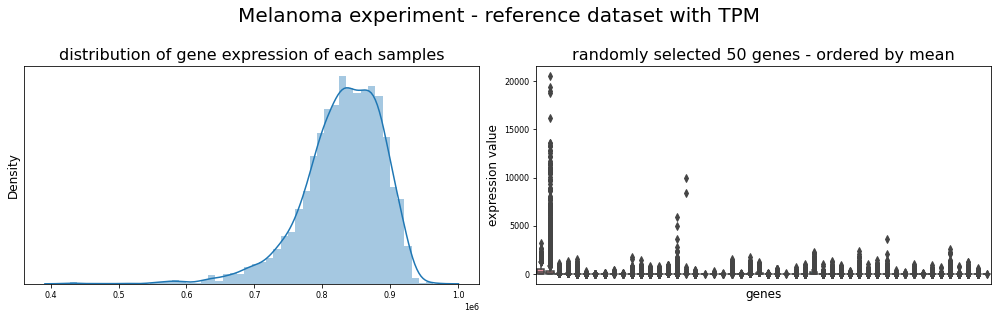

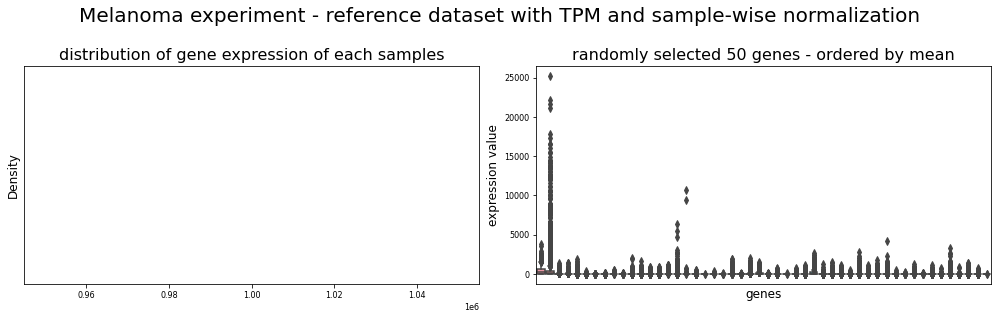

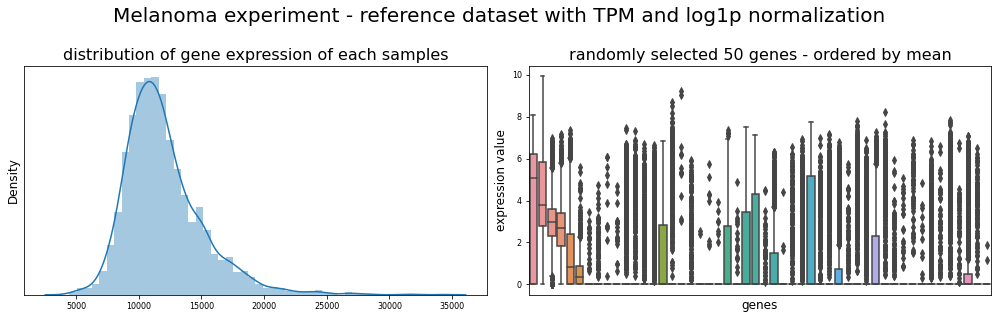

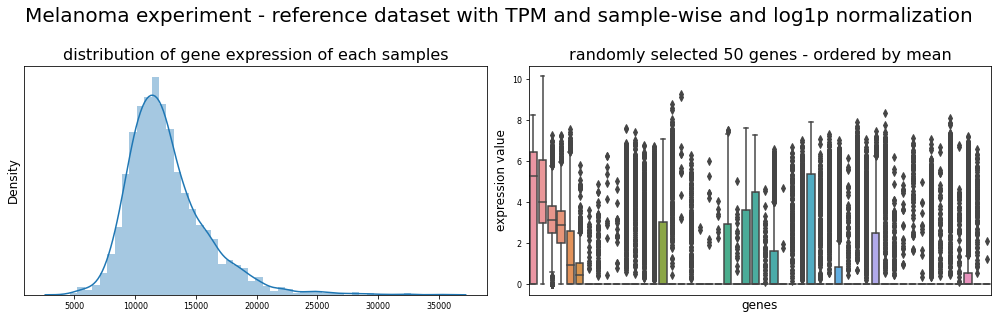

In [10]:
# ORIGINAL DATASET
df_raw = df_melanoma_reference
src.plot_expression_and_sum(df=df_raw
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM'
                        , random_genes=random_genes
                        , png = exper_no+'.1_exper_'+exper+'_'+exper_dataset+'_TPM.png'
                        , output=loc_output)

# ORIGINAL DATASET with SAMPLE-WISE NORMALIZATION
df_sw = pd.concat([df_raw.iloc[:, :-1].div(df_raw.iloc[:, :-1].sum(axis=1), axis=0)*1e6
                   , df_raw.iloc[:, -1]], axis=1)
src.plot_expression_and_sum(df=df_sw
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and sample-wise normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.2_exper_'+exper+'_'+exper_dataset+'_TPM_sw.png'
                        , output=loc_output)

# ORIGINAL DATASET with LOG NORMALIZATION
df_log1p = np.log1p(df_raw.iloc[:, :-1])
src.plot_expression_and_sum(df=df_log1p
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and log1p normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.3_exper_'+exper+'_'+exper_dataset+'_TPM_log1p.png'
                        , output=loc_output)

# ORIGINAL DATASET with SAMPLE-WISE and LOG NORMALIZATION
df_sw_log1p = np.log1p(df_sw.iloc[:, :-1])
src.plot_expression_and_sum(df=df_sw_log1p
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and sample-wise and log1p normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.4_exper_'+exper+'_'+exper_dataset+'_TPM_sw_log1p.png'
                        , output=loc_output)

del(df_raw)
del(df_sw)
del(df_log1p)
del(df_sw_log1p)
del(exper)
del(exper_dataset)
del(exper_no)

### Query Dataset

In [11]:
exper = 'Melanoma'
exper_dataset = 'query'
exper_no = '2'

EXPORTED!!,  ./reports/figures/dataset_analysis/2.1_exper_Melanoma_query_TPM.png
EXPORTED!!,  ./reports/figures/dataset_analysis/2.2_exper_Melanoma_query_TPM_sw.png
EXPORTED!!,  ./reports/figures/dataset_analysis/2.3_exper_Melanoma_query_TPM_log1p.png
EXPORTED!!,  ./reports/figures/dataset_analysis/2.4_exper_Melanoma_query_TPM_sw_log1p.png


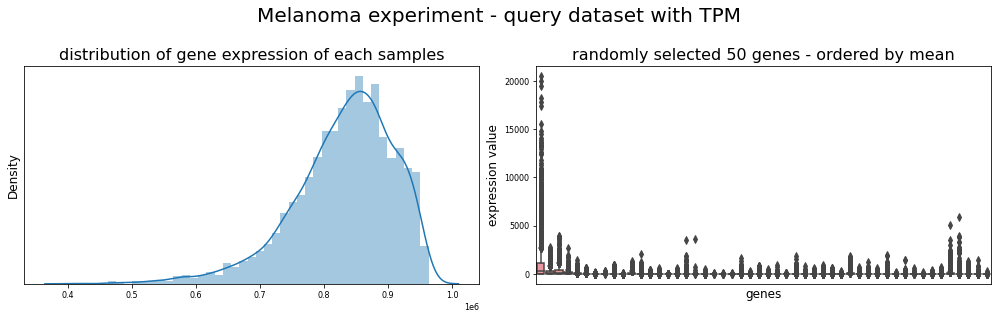

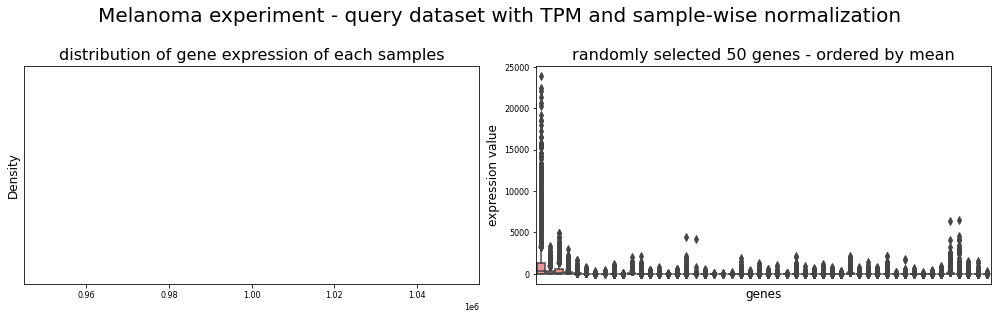

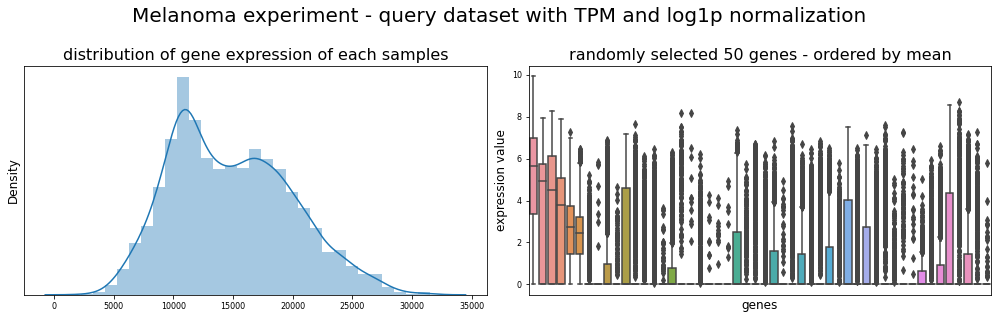

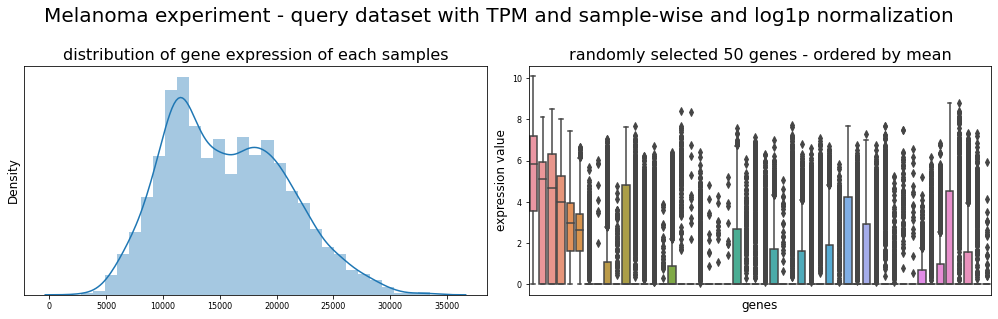

In [12]:
# ORIGINAL DATASET
df_raw = df_melanoma_query
src.plot_expression_and_sum(df=df_raw
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM'
                        , random_genes=random_genes
                        , png = exper_no+'.1_exper_'+exper+'_'+exper_dataset+'_TPM.png'
                        , output=loc_output)

# ORIGINAL DATASET with SAMPLE-WISE NORMALIZATION
df_sw = pd.concat([df_raw.iloc[:, :-1].div(df_raw.iloc[:, :-1].sum(axis=1), axis=0)*1e6
                   , df_raw.iloc[:, -1]], axis=1)
src.plot_expression_and_sum(df=df_sw
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and sample-wise normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.2_exper_'+exper+'_'+exper_dataset+'_TPM_sw.png'
                        , output=loc_output)

# ORIGINAL DATASET with LOG NORMALIZATION
df_log1p = np.log1p(df_raw.iloc[:, :-1])
src.plot_expression_and_sum(df=df_log1p
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and log1p normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.3_exper_'+exper+'_'+exper_dataset+'_TPM_log1p.png'
                        , output=loc_output)

# ORIGINAL DATASET with SAMPLE-WISE and LOG NORMALIZATION
df_sw_log1p = np.log1p(df_sw.iloc[:, :-1])
src.src.plot_expression_and_sum(df=df_sw_log1p
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and sample-wise and log1p normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.4_exper_'+exper+'_'+exper_dataset+'_TPM_sw_log1p.png'
                        , output=loc_output)

del(df_raw)
del(df_sw)
del(df_log1p)
del(df_sw_log1p)
del(exper)
del(exper_dataset)
del(exper_no)

## MOUSE EXPERIMENT

### Training Dataset

In [13]:
exper = 'Mouse'
exper_dataset = 'training'
exper_no = '3'

EXPORTED!!,  ./reports/figures/dataset_analysis/3.1_exper_Mouse_training_TPM.png
EXPORTED!!,  ./reports/figures/dataset_analysis/3.2_exper_Mouse_training_TPM_sw.png
EXPORTED!!,  ./reports/figures/dataset_analysis/3.3_exper_Mouse_training_TPM_log1p.png
EXPORTED!!,  ./reports/figures/dataset_analysis/3.4_exper_Mouse_training_TPM_sw_log1p.png
EXPORTED!!,  ./reports/figures/dataset_analysis/3.5_exper_Mouse_training_TPM_ss.png
EXPORTED!!,  ./reports/figures/dataset_analysis/3.6_exper_Mouse_training_TPM_sw_ss.png


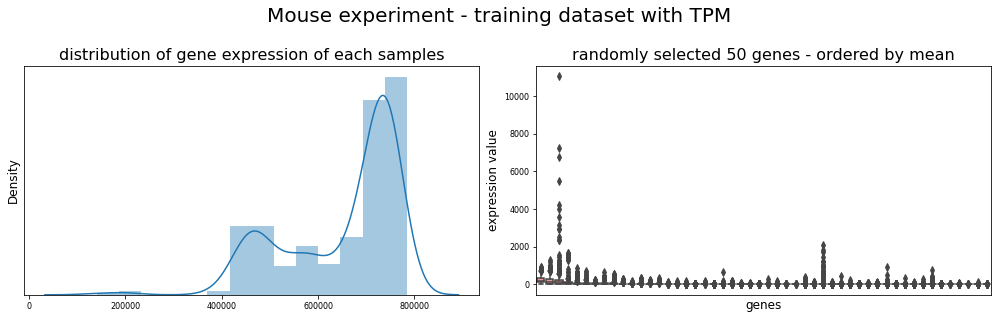

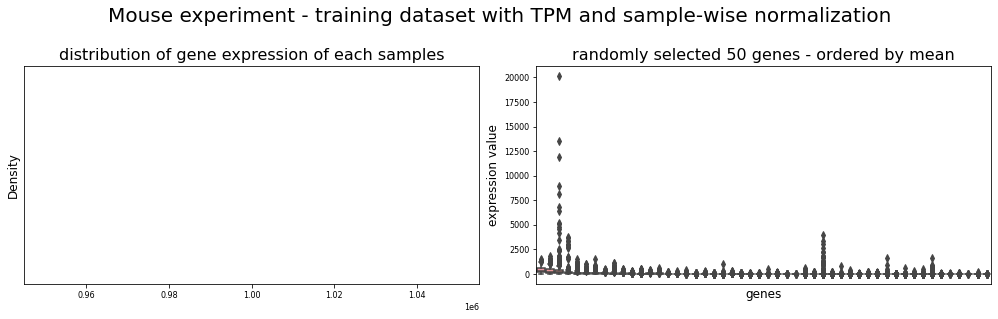

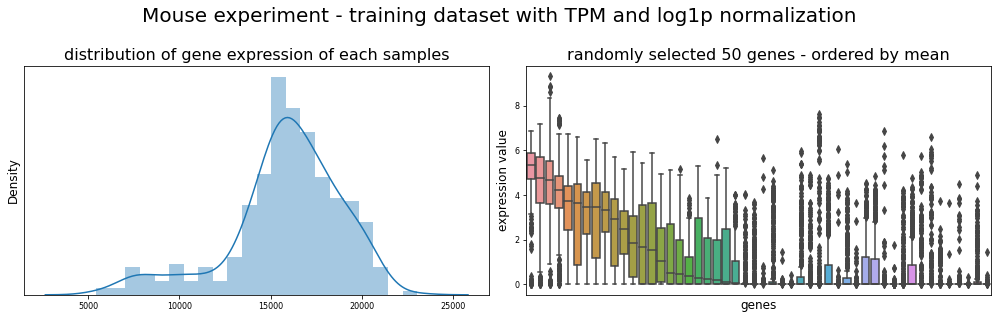

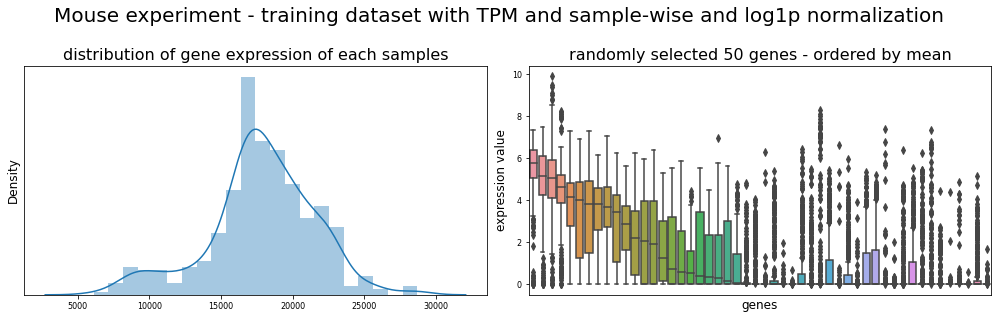

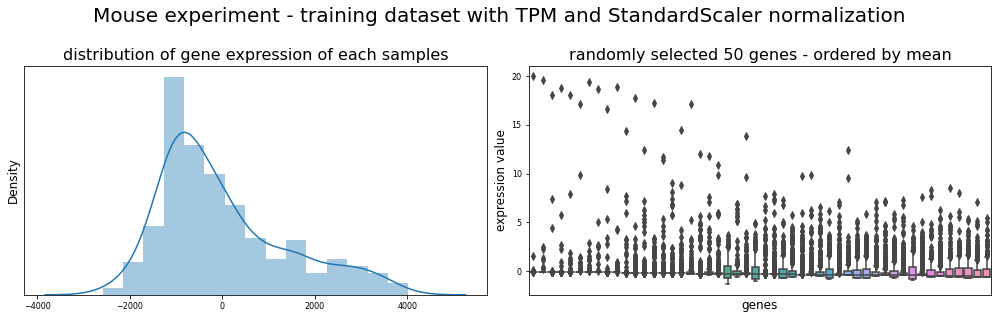

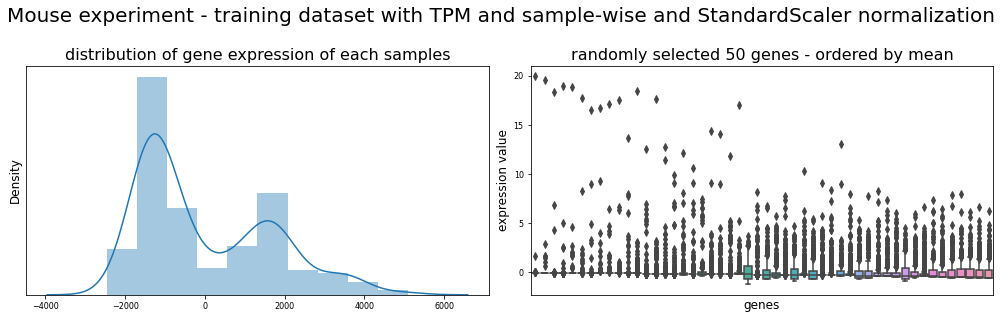

In [14]:
# ORIGINAL DATASET
df_raw = df_mouse_training
df_raw = pd.concat([df_raw.iloc[:, :-1].astype('float'), df_raw.iloc[:, -1]], axis=1)
df_raw.reset_index(drop=True, inplace=True)
df_raw = df_raw.rename_axis(None, axis = 1)
src.plot_expression_and_sum(df=df_raw
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM'
                        , random_genes=random_genes
                        , png = exper_no+'.1_exper_'+exper+'_'+exper_dataset+'_TPM.png'
                        , output=loc_output)

# ORIGINAL DATASET with SAMPLE-WISE NORMALIZATION
df_sw = pd.concat([df_raw.iloc[:, :-1].div(df_raw.iloc[:, :-1].sum(axis=1), axis=0)*1e6
                   , df_raw.iloc[:, -1]], axis=1)
src.plot_expression_and_sum(df=df_sw
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and sample-wise normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.2_exper_'+exper+'_'+exper_dataset+'_TPM_sw.png'
                        , output=loc_output)

# ORIGINAL DATASET with LOG NORMALIZATION
df_log1p = np.log1p(df_raw.iloc[:, :-1])
src.plot_expression_and_sum(df=df_log1p
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and log1p normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.3_exper_'+exper+'_'+exper_dataset+'_TPM_log1p.png'
                        , output=loc_output)

# ORIGINAL DATASET with SAMPLE-WISE and LOG NORMALIZATION
df_sw_log1p = np.log1p(df_sw.iloc[:, :-1])
src.plot_expression_and_sum(df=df_sw_log1p
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and sample-wise and log1p normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.4_exper_'+exper+'_'+exper_dataset+'_TPM_sw_log1p.png'
                        , output=loc_output)

## ORIGINAL DATASET with STANDARDSCALER NORMALIZATION
df_ss = pd.concat([ pd.DataFrame(StandardScaler().fit_transform(df_raw.iloc[:, :-1]), columns=df_raw.iloc[:, :-1].columns)
           , df_raw.iloc[:, -1]], axis=1)
src.plot_expression_and_sum(df=df_ss
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and StandardScaler normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.5_exper_'+exper+'_'+exper_dataset+'_TPM_ss.png'
                        , output=loc_output)

# ORIGINAL DATASET with SAMPLE-WISE and STANDARDSCALER NORMALIZATION
df_sw_ss = pd.concat([ pd.DataFrame(StandardScaler().fit_transform(df_sw.iloc[:, :-1]), columns=df_sw.iloc[:, :-1].columns)
           , df_sw.iloc[:, -1]], axis=1)
src.plot_expression_and_sum(df=df_sw_ss
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and sample-wise and StandardScaler normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.6_exper_'+exper+'_'+exper_dataset+'_TPM_sw_ss.png'
                        , output=loc_output)

del(df_raw)
del(df_sw)
del(df_log1p)
del(df_sw_log1p)
del(exper)
del(exper_dataset)
del(exper_no)
del(df_ss)
del(df_sw_ss)

### Retrieval Dataset

In [15]:
exper = 'Mouse'
exper_dataset = 'retrieval'
exper_no = '4'

EXPORTED!!,  ./reports/figures/dataset_analysis/4.1_exper_Mouse_retrieval_TPM.png
EXPORTED!!,  ./reports/figures/dataset_analysis/4.2_exper_Mouse_retrieval_TPM_sw.png
EXPORTED!!,  ./reports/figures/dataset_analysis/4.3_exper_Mouse_retrieval_TPM_log1p.png
EXPORTED!!,  ./reports/figures/dataset_analysis/4.4_exper_Mouse_retrieval_TPM_sw_log1p.png
EXPORTED!!,  ./reports/figures/dataset_analysis/4.5_exper_Mouse_retrieval_TPM_ss.png
EXPORTED!!,  ./reports/figures/dataset_analysis/4.6_exper_Mouse_retrieval_TPM_sw_ss.png


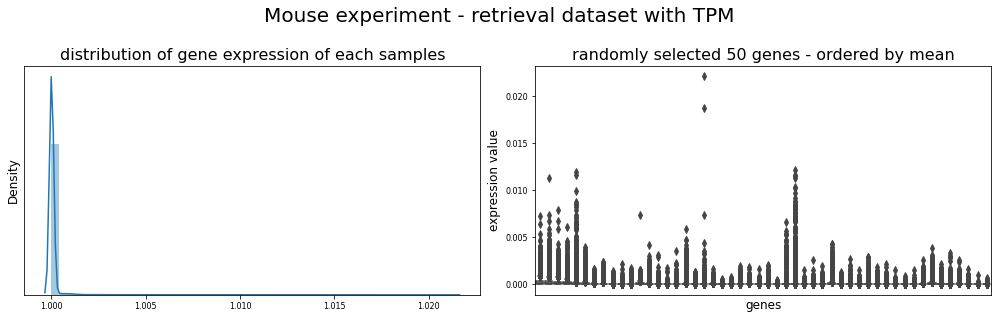

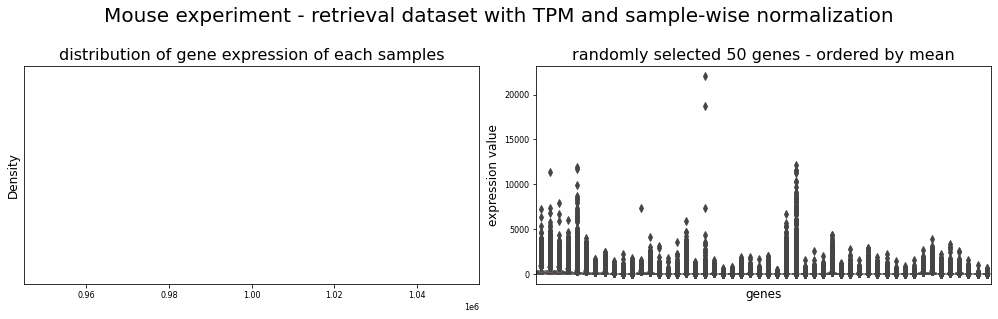

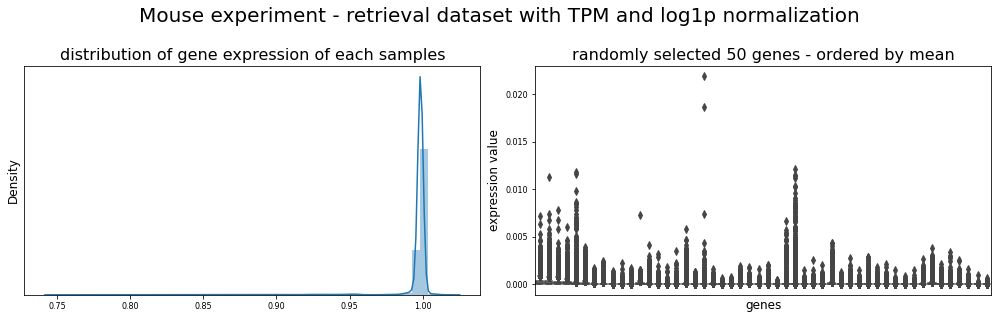

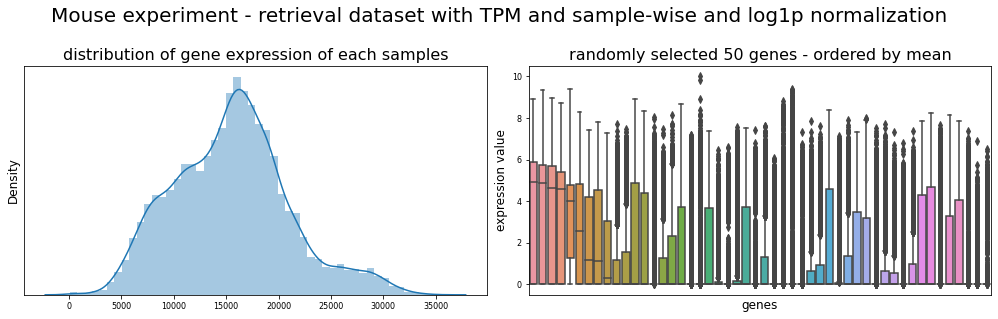

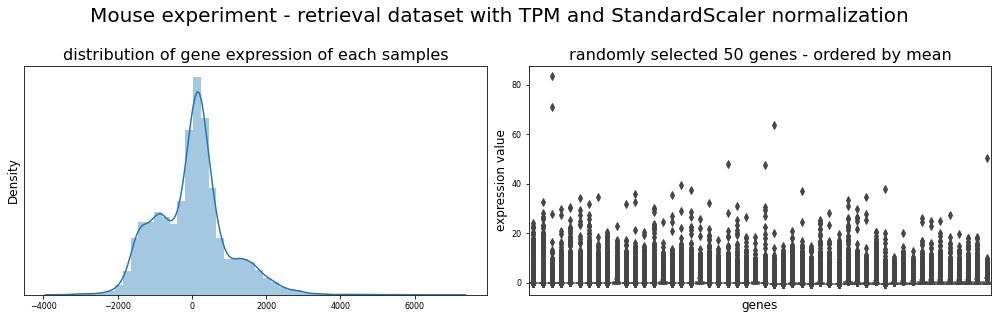

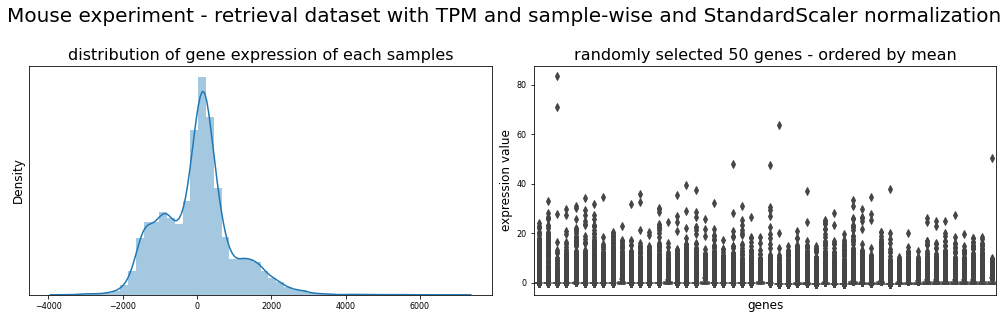

In [16]:
# ORIGINAL DATASET
df_raw = df_mouse_retrieval
df_raw = pd.concat([df_raw.iloc[:, :-1].astype('float'), df_raw.iloc[:, -1]], axis=1)
df_raw.reset_index(drop=True, inplace=True)
df_raw = df_raw.rename_axis(None, axis = 1)
src.plot_expression_and_sum(df=df_raw
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM'
                        , random_genes=random_genes
                        , png = exper_no+'.1_exper_'+exper+'_'+exper_dataset+'_TPM.png'
                        , output=loc_output)

# ORIGINAL DATASET with SAMPLE-WISE NORMALIZATION
df_sw = pd.concat([df_raw.iloc[:, :-1].div(df_raw.iloc[:, :-1].sum(axis=1), axis=0)*1e6
                   , df_raw.iloc[:, -1]], axis=1)
src.plot_expression_and_sum(df=df_sw
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and sample-wise normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.2_exper_'+exper+'_'+exper_dataset+'_TPM_sw.png'
                        , output=loc_output)

# ORIGINAL DATASET with LOG NORMALIZATION
df_log1p = np.log1p(df_raw.iloc[:, :-1])
src.plot_expression_and_sum(df=df_log1p
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and log1p normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.3_exper_'+exper+'_'+exper_dataset+'_TPM_log1p.png'
                        , output=loc_output)

# ORIGINAL DATASET with SAMPLE-WISE and LOG NORMALIZATION
df_sw_log1p = np.log1p(df_sw.iloc[:, :-1])
src.plot_expression_and_sum(df=df_sw_log1p
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and sample-wise and log1p normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.4_exper_'+exper+'_'+exper_dataset+'_TPM_sw_log1p.png'
                        , output=loc_output)

## ORIGINAL DATASET with STANDARDSCALER NORMALIZATION
df_ss = pd.concat([ pd.DataFrame(StandardScaler().fit_transform(df_raw.iloc[:, :-1]), columns=df_raw.iloc[:, :-1].columns)
           , df_raw.iloc[:, -1]], axis=1)
src.plot_expression_and_sum(df=df_ss
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and StandardScaler normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.5_exper_'+exper+'_'+exper_dataset+'_TPM_ss.png'
                        , output=loc_output)

# ORIGINAL DATASET with SAMPLE-WISE and STANDARDSCALER NORMALIZATION
df_sw_ss = pd.concat([ pd.DataFrame(StandardScaler().fit_transform(df_sw.iloc[:, :-1]), columns=df_sw.iloc[:, :-1].columns)
           , df_sw.iloc[:, -1]], axis=1)
src.plot_expression_and_sum(df=df_sw_ss
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and sample-wise and StandardScaler normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.6_exper_'+exper+'_'+exper_dataset+'_TPM_sw_ss.png'
                        , output=loc_output)

del(df_raw)
del(df_sw)
del(df_log1p)
del(df_sw_log1p)
del(exper)
del(exper_dataset)
del(exper_no)
del(df_ss)
del(df_sw_ss)

## PBMC EXPERIMENT

In [25]:
# df_raw = df_pbmc[random_genes]
# df_raw = df_raw.astype('float')
# df_raw.reset_index(drop=True, inplace=True)
# df_raw = df_raw.rename_axis(None, axis = 1)

exper = 'pbmc'
exper_dataset = ''
exper_no = '5'

EXPORTED!!,  ./reports/figures/dataset_analysis/5.1_exper_pbmc_.png
EXPORTED!!,  ./reports/figures/dataset_analysis/5.2_exper_pbmc__sw.png
EXPORTED!!,  ./reports/figures/dataset_analysis/5.3_exper_pbmc__log1p.png
EXPORTED!!,  ./reports/figures/dataset_analysis/5.4_exper_pbmc__sw_log1p.png


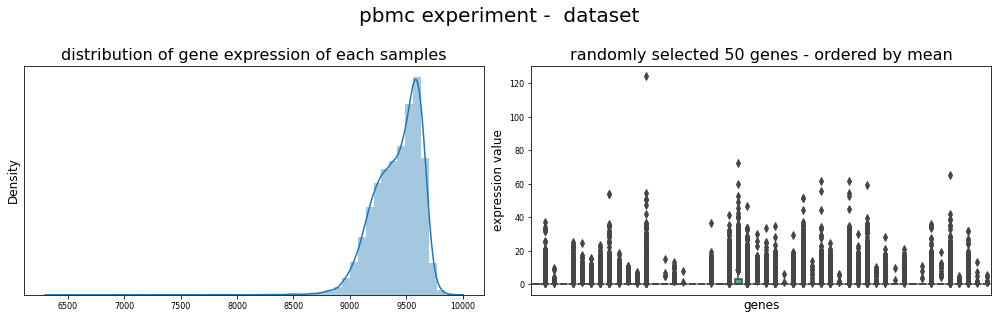

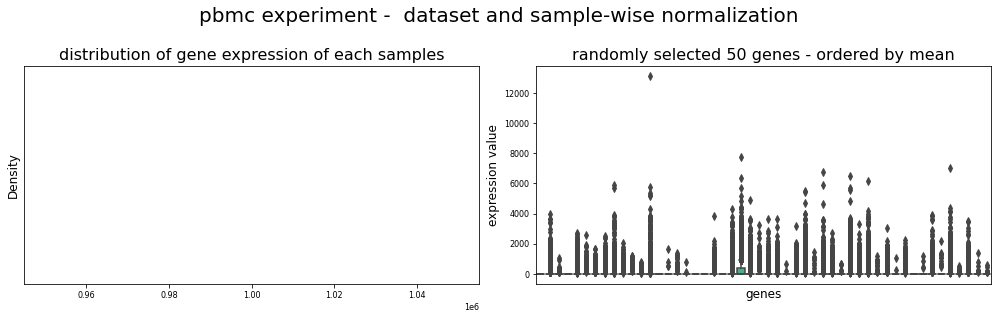

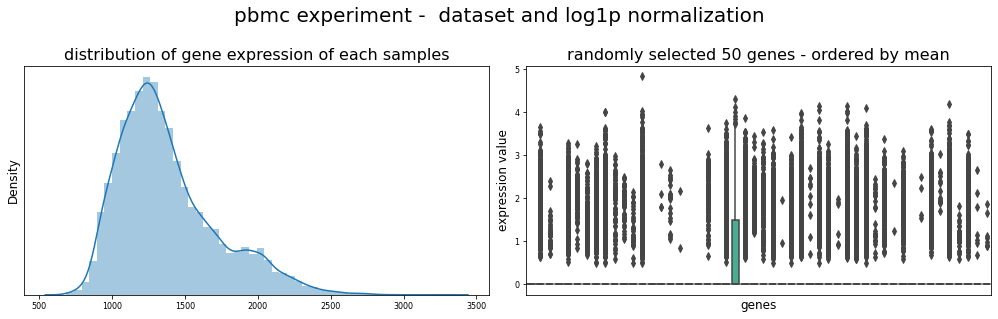

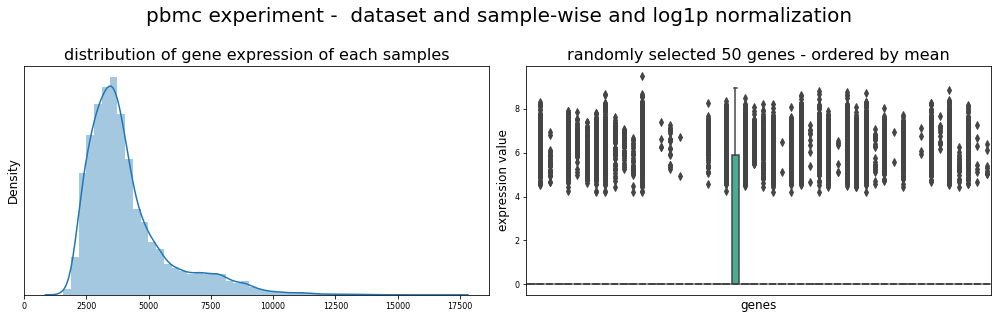

In [26]:
# ORIGINAL DATASET
df_raw = df_pbmc
df_raw = pd.concat([df_raw.iloc[:, :-1].astype('float'), df_raw.iloc[:, -1]], axis=1)
df_raw.reset_index(drop=True, inplace=True)
df_raw = df_raw.rename_axis(None, axis = 1)
src.plot_expression_and_sum(df=df_raw
                        , title=exper+' experiment - '+exper_dataset+' dataset'
                        , random_genes=random_genes
                        , png = exper_no+'.1_exper_'+exper+'_'+exper_dataset+'.png'
                        , output=loc_output)

# ORIGINAL DATASET with SAMPLE-WISE NORMALIZATION
df_sw = pd.concat([df_raw.iloc[:, :-1].div(df_raw.iloc[:, :-1].sum(axis=1), axis=0)*1e6
                   , df_raw.iloc[:, -1]], axis=1)
src.plot_expression_and_sum(df=df_sw
                        , title=exper+' experiment - '+exper_dataset+' dataset and sample-wise normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.2_exper_'+exper+'_'+exper_dataset+'_sw.png'
                        , output=loc_output)

# ORIGINAL DATASET with LOG NORMALIZATION
df_log1p = np.log1p(df_raw.iloc[:, :-1])
src.plot_expression_and_sum(df=df_log1p
                        , title=exper+' experiment - '+exper_dataset+' dataset and log1p normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.3_exper_'+exper+'_'+exper_dataset+'_log1p.png'
                        , output=loc_output)

# ORIGINAL DATASET with SAMPLE-WISE and LOG NORMALIZATION
df_sw_log1p = np.log1p(df_sw.iloc[:, :-1])
src.plot_expression_and_sum(df=df_sw_log1p
                        , title=exper+' experiment - '+exper_dataset+' dataset and sample-wise and log1p normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.4_exper_'+exper+'_'+exper_dataset+'_sw_log1p.png'
                        , output=loc_output)

del(df_raw)
del(df_sw)
del(df_log1p)
del(df_sw_log1p)
del(exper)
del(exper_dataset)
del(exper_no)

## IMMUNE EXPERIMENT

In [23]:
exper = 'immune'
exper_dataset = ''
exper_no = '6'

EXPORTED!!,  ./reports/figures/dataset_analysis/6.1_exper_immune_.png
EXPORTED!!,  ./reports/figures/dataset_analysis/6.2_exper_immune__sw.png
EXPORTED!!,  ./reports/figures/dataset_analysis/6.3_exper_immune__log1p.png
EXPORTED!!,  ./reports/figures/dataset_analysis/6.4_exper_immune__sw_log1p.png


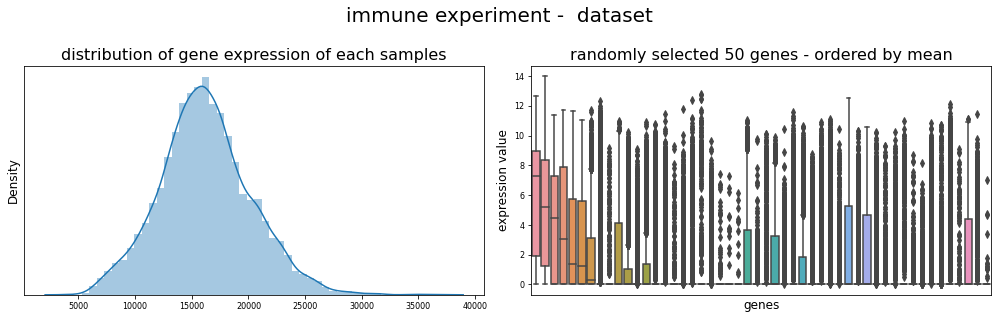

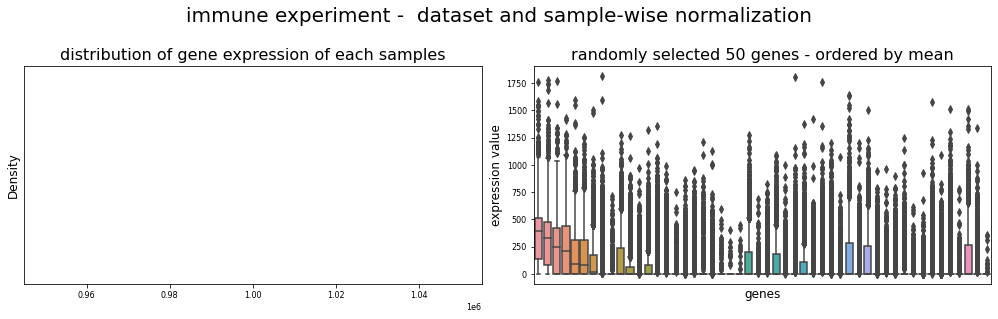

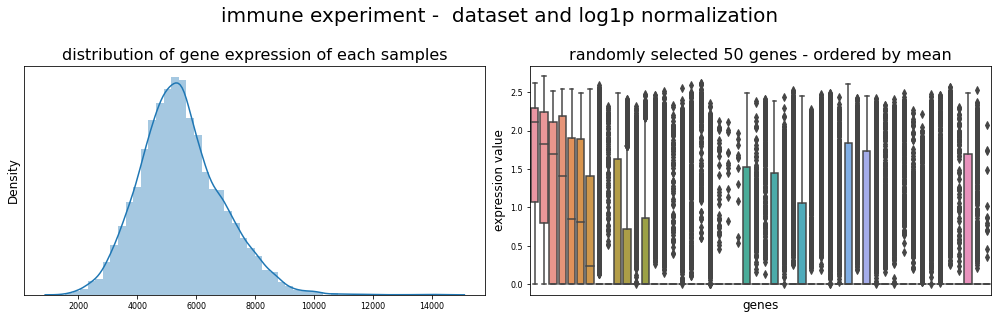

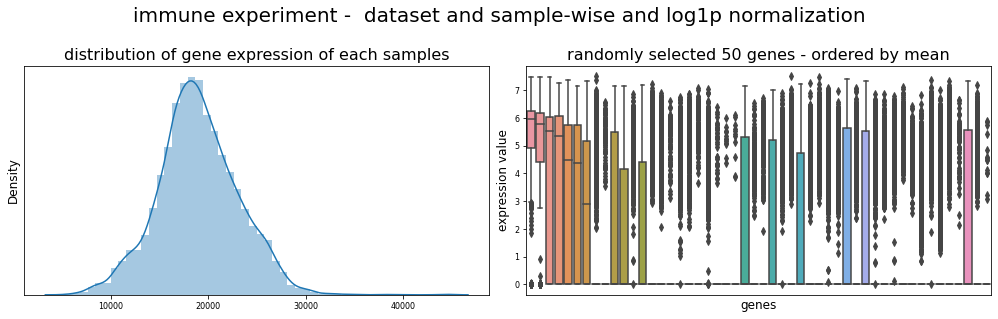

In [24]:
# ORIGINAL DATASET
df_raw = df_immune
src.plot_expression_and_sum(df=df_raw
                        , title=exper+' experiment - '+exper_dataset+' dataset'
                        , random_genes=random_genes
                        , png = exper_no+'.1_exper_'+exper+'_'+exper_dataset+'.png'
                        , output=loc_output)

# ORIGINAL DATASET with SAMPLE-WISE NORMALIZATION
df_sw = pd.concat([df_raw.iloc[:, :-1].div(df_raw.iloc[:, :-1].sum(axis=1), axis=0)*1e6
                   , df_raw.iloc[:, -1]], axis=1)
src.plot_expression_and_sum(df=df_sw
                        , title=exper+' experiment - '+exper_dataset+' dataset and sample-wise normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.2_exper_'+exper+'_'+exper_dataset+'_sw.png'
                        , output=loc_output)

# ORIGINAL DATASET with LOG NORMALIZATION
df_log1p = np.log1p(df_raw.iloc[:, :-1])
src.plot_expression_and_sum(df=df_log1p
                        , title=exper+' experiment - '+exper_dataset+' dataset and log1p normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.3_exper_'+exper+'_'+exper_dataset+'_log1p.png'
                        , output=loc_output)

# ORIGINAL DATASET with SAMPLE-WISE and LOG NORMALIZATION
df_sw_log1p = np.log1p(df_sw.iloc[:, :-1])
src.plot_expression_and_sum(df=df_sw_log1p
                        , title=exper+' experiment - '+exper_dataset+' dataset and sample-wise and log1p normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.4_exper_'+exper+'_'+exper_dataset+'_sw_log1p.png'
                        , output=loc_output)

del(df_raw)
del(df_sw)
del(df_log1p)
del(df_sw_log1p)
del(exper)
del(exper_dataset)
del(exper_no)

## GENE SPACE

In [27]:
print('melanoma_reference,', (df_melanoma_reference.iloc[:, df_melanoma_reference.columns.isin(df_bio['symbol'])]).shape)
print('melanoma_query    ,', (df_melanoma_query.iloc[:, df_melanoma_query.columns.isin(df_bio['symbol'])]).shape)
print('mouse_training    ,', (df_mouse_training.iloc[:, df_mouse_training.columns.isin(df_bio['symbol'])]).shape)
print('mouse_retrieval   ,', (df_mouse_retrieval.iloc[:, df_mouse_retrieval.columns.isin(df_bio['symbol'])]).shape)
print('pbmc              ,', (df_pbmc.iloc[:, df_pbmc.columns.isin(df_bio['symbol'])]).shape)
print('immune            ,', (df_immune.iloc[:, df_immune.columns.isin(df_bio['symbol'])]).shape)

melanoma_reference, (2761, 2877)
melanoma_query    , (3412, 2877)
mouse_training    , (402, 1648)
mouse_retrieval   , (17293, 1648)
pbmc              , (17500, 2348)
immune            , (9703, 2800)
